In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Layer
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from scipy.stats import randint, uniform

In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 3.3 MB/s eta 0:00:0000:0100:02
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl (26.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 4.9 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.7 MB/s eta 0:00:00a 0:00:01
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached opt

In [8]:
pip install numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 5.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("/Users/shreya/Desktop/BiGRU_AM/processed_data2.csv")
df.head()

,Serial number,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Month_encoded
0,1,Ahmedabad,2015-01-29 09:00:00,0.051896,0.15735,-0.717443,-0.589015,-0.525303,0.112012,0.032461,...,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
1,2,Ahmedabad,2015-01-29 12:00:00,0.099619,0.15735,-0.741590,-0.815643,-0.641089,0.112012,-0.347962,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
2,3,Ahmedabad,2015-01-29 13:00:00,-0.136347,0.15735,-0.747717,-0.922628,-0.751600,0.112012,-0.444487,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
3,4,Ahmedabad,2015-01-29 14:00:00,-0.149292,0.15735,-0.745915,-0.836468,-0.678852,0.112012,-0.416097,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
4,5,Ahmedabad,2015-01-29 15:00:00,-0.249729,0.15735,-0.753123,-0.908745,-0.740493,0.112012,-0.529656,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Convert categorical data to numerical data using LabelEncoder
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

# Selecting specific columns for K-Means clustering
columns_for_clustering = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
data_for_clustering = df[columns_for_clustering]

# Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_for_clustering)

# Cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print("Cluster centers:\n", centers)
print("Labels:\n", labels)



/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers:
 [[-0.52747487 -0.43198534 -0.48064398 -0.45338286 -0.23359927 -0.55537655
  -0.22995398 -0.35859909 -0.5461782 ]
 [ 0.38833678 -0.13751464  0.0226296   0.09180631  4.49951739 -0.15595201
  -0.06197016  0.18573277 -0.18847703]
 [ 0.7554014   0.82987516  1.26802168  2.03420612  0.42487258  0.28972197
   0.93387634  0.65850843  0.18143017]]
Labels:
 [0 0 0 ... 0 0 0]


In [4]:
!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.4.2 from https://files.pythonhosted.org/packages/6c/97/dfc635bd435655c1216756b543e0427579df144914a055a188d3c0ffd52f/scikit_learn-1.5.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-le

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

# Define features and target including encoded columns
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (699999, 17)
X_test shape: (300000, 17)
y_train shape: (699999,)
y_test shape: (300000,)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Layer
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Define numerical columns
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

# Reshape data for BiGRU input
X_train_reshaped = np.expand_dims(X_train[numerical_cols].values, axis=-1)  # Assuming numerical_cols are your numerical features
X_test_reshaped = np.expand_dims(X_test[numerical_cols].values, axis=-1)

# Verify the shape of reshaped data
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# Custom Attention layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(a * x, axis=1)
        return output

# Define BiGRU-AM model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Attention(),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


X_train_reshaped shape: (699999, 11, 1)
X_test_reshaped shape: (300000, 11, 1)


/Users/shreya/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 215s 10ms/step - loss: 0.2127 - val_loss: 0.1458
Epoch 2/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - loss: 0.1361 - val_loss: 0.1162
Epoch 3/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - loss: 0.1087 - val_loss: 0.0993
Epoch 4/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - loss: 0.0941 - val_loss: 0.0893
Epoch 5/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - loss: 0.0846 - val_loss: 0.0859
Epoch 6/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 213s 10ms/step - loss: 0.0781 - val_loss: 0.0821
Epoch 7/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 215s 10ms/step - loss: 0.0744 - val_loss: 0.0789
Epoch 8/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 229s 10ms/step - loss: 0.0711 - val_loss: 0.0736
Epoch 9/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 237s 11ms/step - loss: 0.0697 - val_loss: 0.0743
Epoch 10/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 216s 10ms/step - loss: 0.0672 - val_loss: 0.0772


In [7]:
# Continue training the model for 5 more epochs
history_additional = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 218s 10ms/step - loss: 0.0657 - val_loss: 0.0705
Epoch 2/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 219s 10ms/step - loss: 0.0631 - val_loss: 0.0676
Epoch 3/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 220s 10ms/step - loss: 0.0631 - val_loss: 0.0704
Epoch 4/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 218s 10ms/step - loss: 0.0609 - val_loss: 0.0677
Epoch 5/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 217s 10ms/step - loss: 0.0611 - val_loss: 0.0665


21875/21875 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.0575
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.0673
Training loss (MSE): 0.057903654873371124
Validation loss (MSE): 0.06649941205978394
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step
Training MAE: 0.1514892632751129
Training RMSE: 0.24063208147132353
Training R^2: 0.9371151980612477
Validation MAE: 0.1597802179660977
Validation RMSE: 0.2578750131348387
Validation R^2: 0.9277475935116613


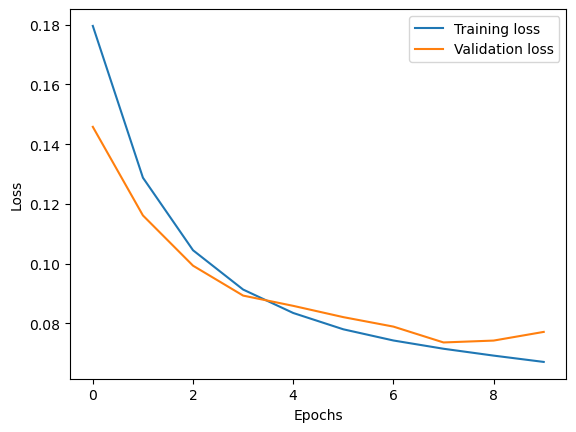

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

#history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
# Evaluate the model
train_loss = model.evaluate(X_train_reshaped, y_train)
val_loss = model.evaluate(X_test_reshaped, y_test)
print("Training loss (MSE):", train_loss)
print("Validation loss (MSE):", val_loss)

# Make predictions
y_train_pred = model.predict(X_train_reshaped)
y_val_pred = model.predict(X_test_reshaped)

# Calculate additional evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

val_mae = mean_absolute_error(y_test, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
val_r2 = r2_score(y_test, y_val_pred)

print("Training MAE:", train_mae)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)

print("Validation MAE:", val_mae)
print("Validation RMSE:", val_rmse)
print("Validation R^2:", val_r2)

# Plot learning curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
#CREATE A CUSTOM WRAPPER
from sklearn.base import BaseEstimator, RegressorMixin

class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs=1, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        from sklearn.metrics import mean_squared_error
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)


In [11]:
pip install --upgrade scikit-learn scikeras


Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Layer, Input
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

# Define numerical columns
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Reshape data for BiGRU input
X_train_reshaped = np.expand_dims(X_train[numerical_cols].values, axis=-1)  # Assuming numerical_cols are your numerical features
X_test_reshaped = np.expand_dims(X_test[numerical_cols].values, axis=-1)

# Custom Attention layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(a * x, axis=1)
        return output

# Function to build the model with hyperparameters
def build_model(learning_rate=0.001, units=64):
    input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
    model = Sequential([
        Input(shape=input_shape),
        Bidirectional(GRU(units, return_sequences=True)),
        Attention(),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Custom wrapper class
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, learning_rate=0.001, units=64, epochs=10, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.learning_rate = learning_rate
        self.units = units
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(learning_rate=self.learning_rate, units=self.units)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)

# Define k-fold cross-validation with fewer folds
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the hyperparameter space with reduced ranges
param_distributions = {
    'learning_rate': uniform(1e-4, 1e-3),  # Reduced range
    'units': randint(32, 64),  # Reduced range
    'epochs': randint(10, 30),  # Reduced range
    'batch_size': randint(16, 32)  # Reduced range
}

# Instantiate the custom Keras regressor
keras_regressor = CustomKerasRegressor(build_fn=build_model)

# Perform hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=keras_regressor, param_distributions=param_distributions, n_iter=5, cv=kfold, scoring='neg_mean_squared_error', random_state=42)
random_search_result = random_search.fit(X_train_reshaped, y_train)

# Print the best hyperparameters and score
print(f"Best Hyperparameters: {random_search_result.best_params_}")
print(f"Best Cross-Validation MSE: {-random_search_result.best_score_}")

# Optionally, evaluate the best model on the test set
best_model = random_search_result.best_estimator_.model
test_mse = best_model.evaluate(X_test_reshaped, y_test)
print(f"Test MSE: {test_mse}")


7292/7292 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
7292/7292 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
Best Hyperparameters: {'batch_size': 23, 'epochs': 16, 'learning_rate': 0.0005458327528535912, 'units': 54}
Best Cross-Validation MSE: 0.08230491575982107
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0769
Test MSE: 0.07607568800449371


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_model = random_search_result.best_estimator_.model

# Step 3: Make predictions
y_pred = best_model.predict(X_test_reshaped).flatten()

# Step 4: Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2 Score: {test_r2}")

# Optional: Compare predictions with actual values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head(10))


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
Test MSE: 0.0760756596580811
Test MAE: 0.16940976099583074
Test R2 Score: 0.9173430231200786
          Actual  Predicted
987230  0.645208   0.496956
79954   0.253429  -0.380930
567130 -0.209581  -0.340340
500891 -1.144507  -1.088253
55399  -0.930810  -0.576441
135049 -0.699304  -0.444963
693949 -0.993138  -1.171131
732056  1.286300   1.213243
51333  -0.530127  -0.611912
995352  2.301362   2.063545
